In [ ]:
## Simple Network from original data with "Tweet_From" and "Screen Name"

In [ ]:
import networkx as nx
import pandas as pd

df_german = pd.read_csv("/content/colab_test.csv")
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = df_german["target"] #Set the list of followers as the target column
df['source'] = df_german["source"] #Set my user ID as the source 

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

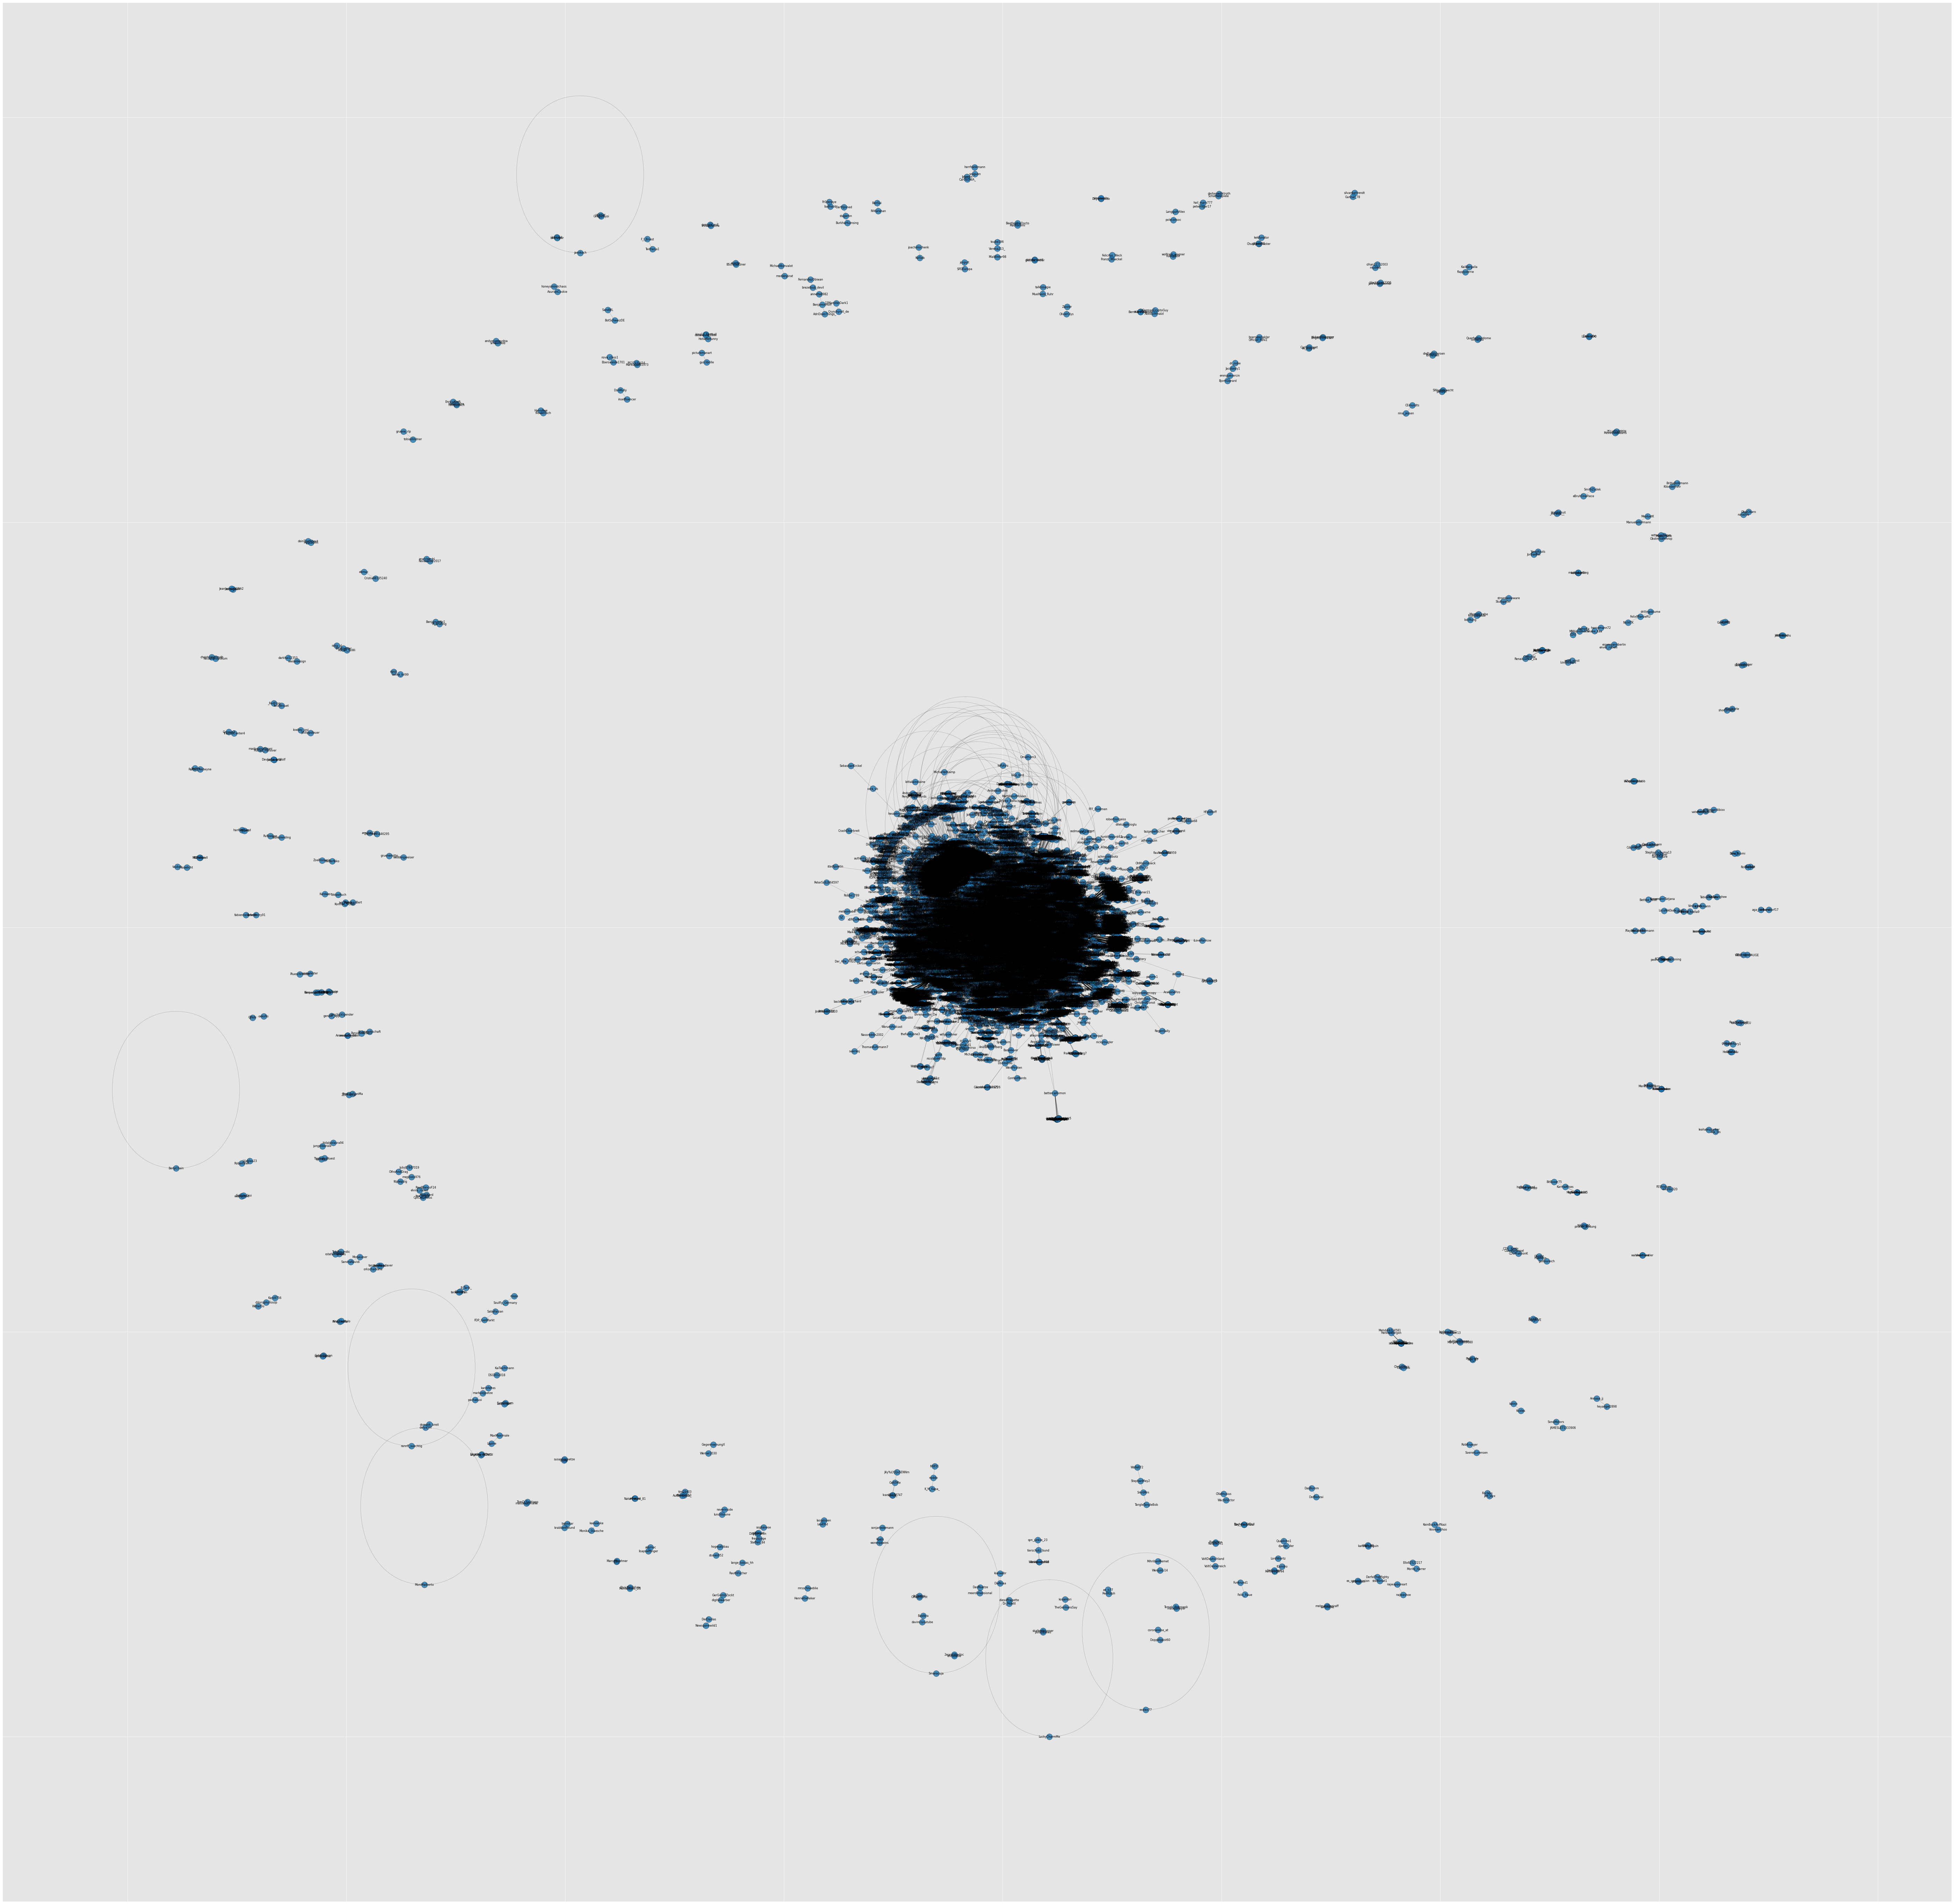

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(100, 100))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

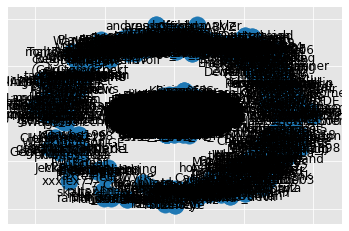

In [ ]:
G_weighted = nx.Graph()
df1 = pd.read_csv("/content/colab_test_df1.csv")
df1.head(2)

for i1, data1 in df1.iterrows():
  if data1["Tweet_From"]:
    G_weighted.add_edge(data1["Tweet_From"], data1["Screen Name"], weight = data1["Frequency"])
nx.draw_networkx(G_weighted)

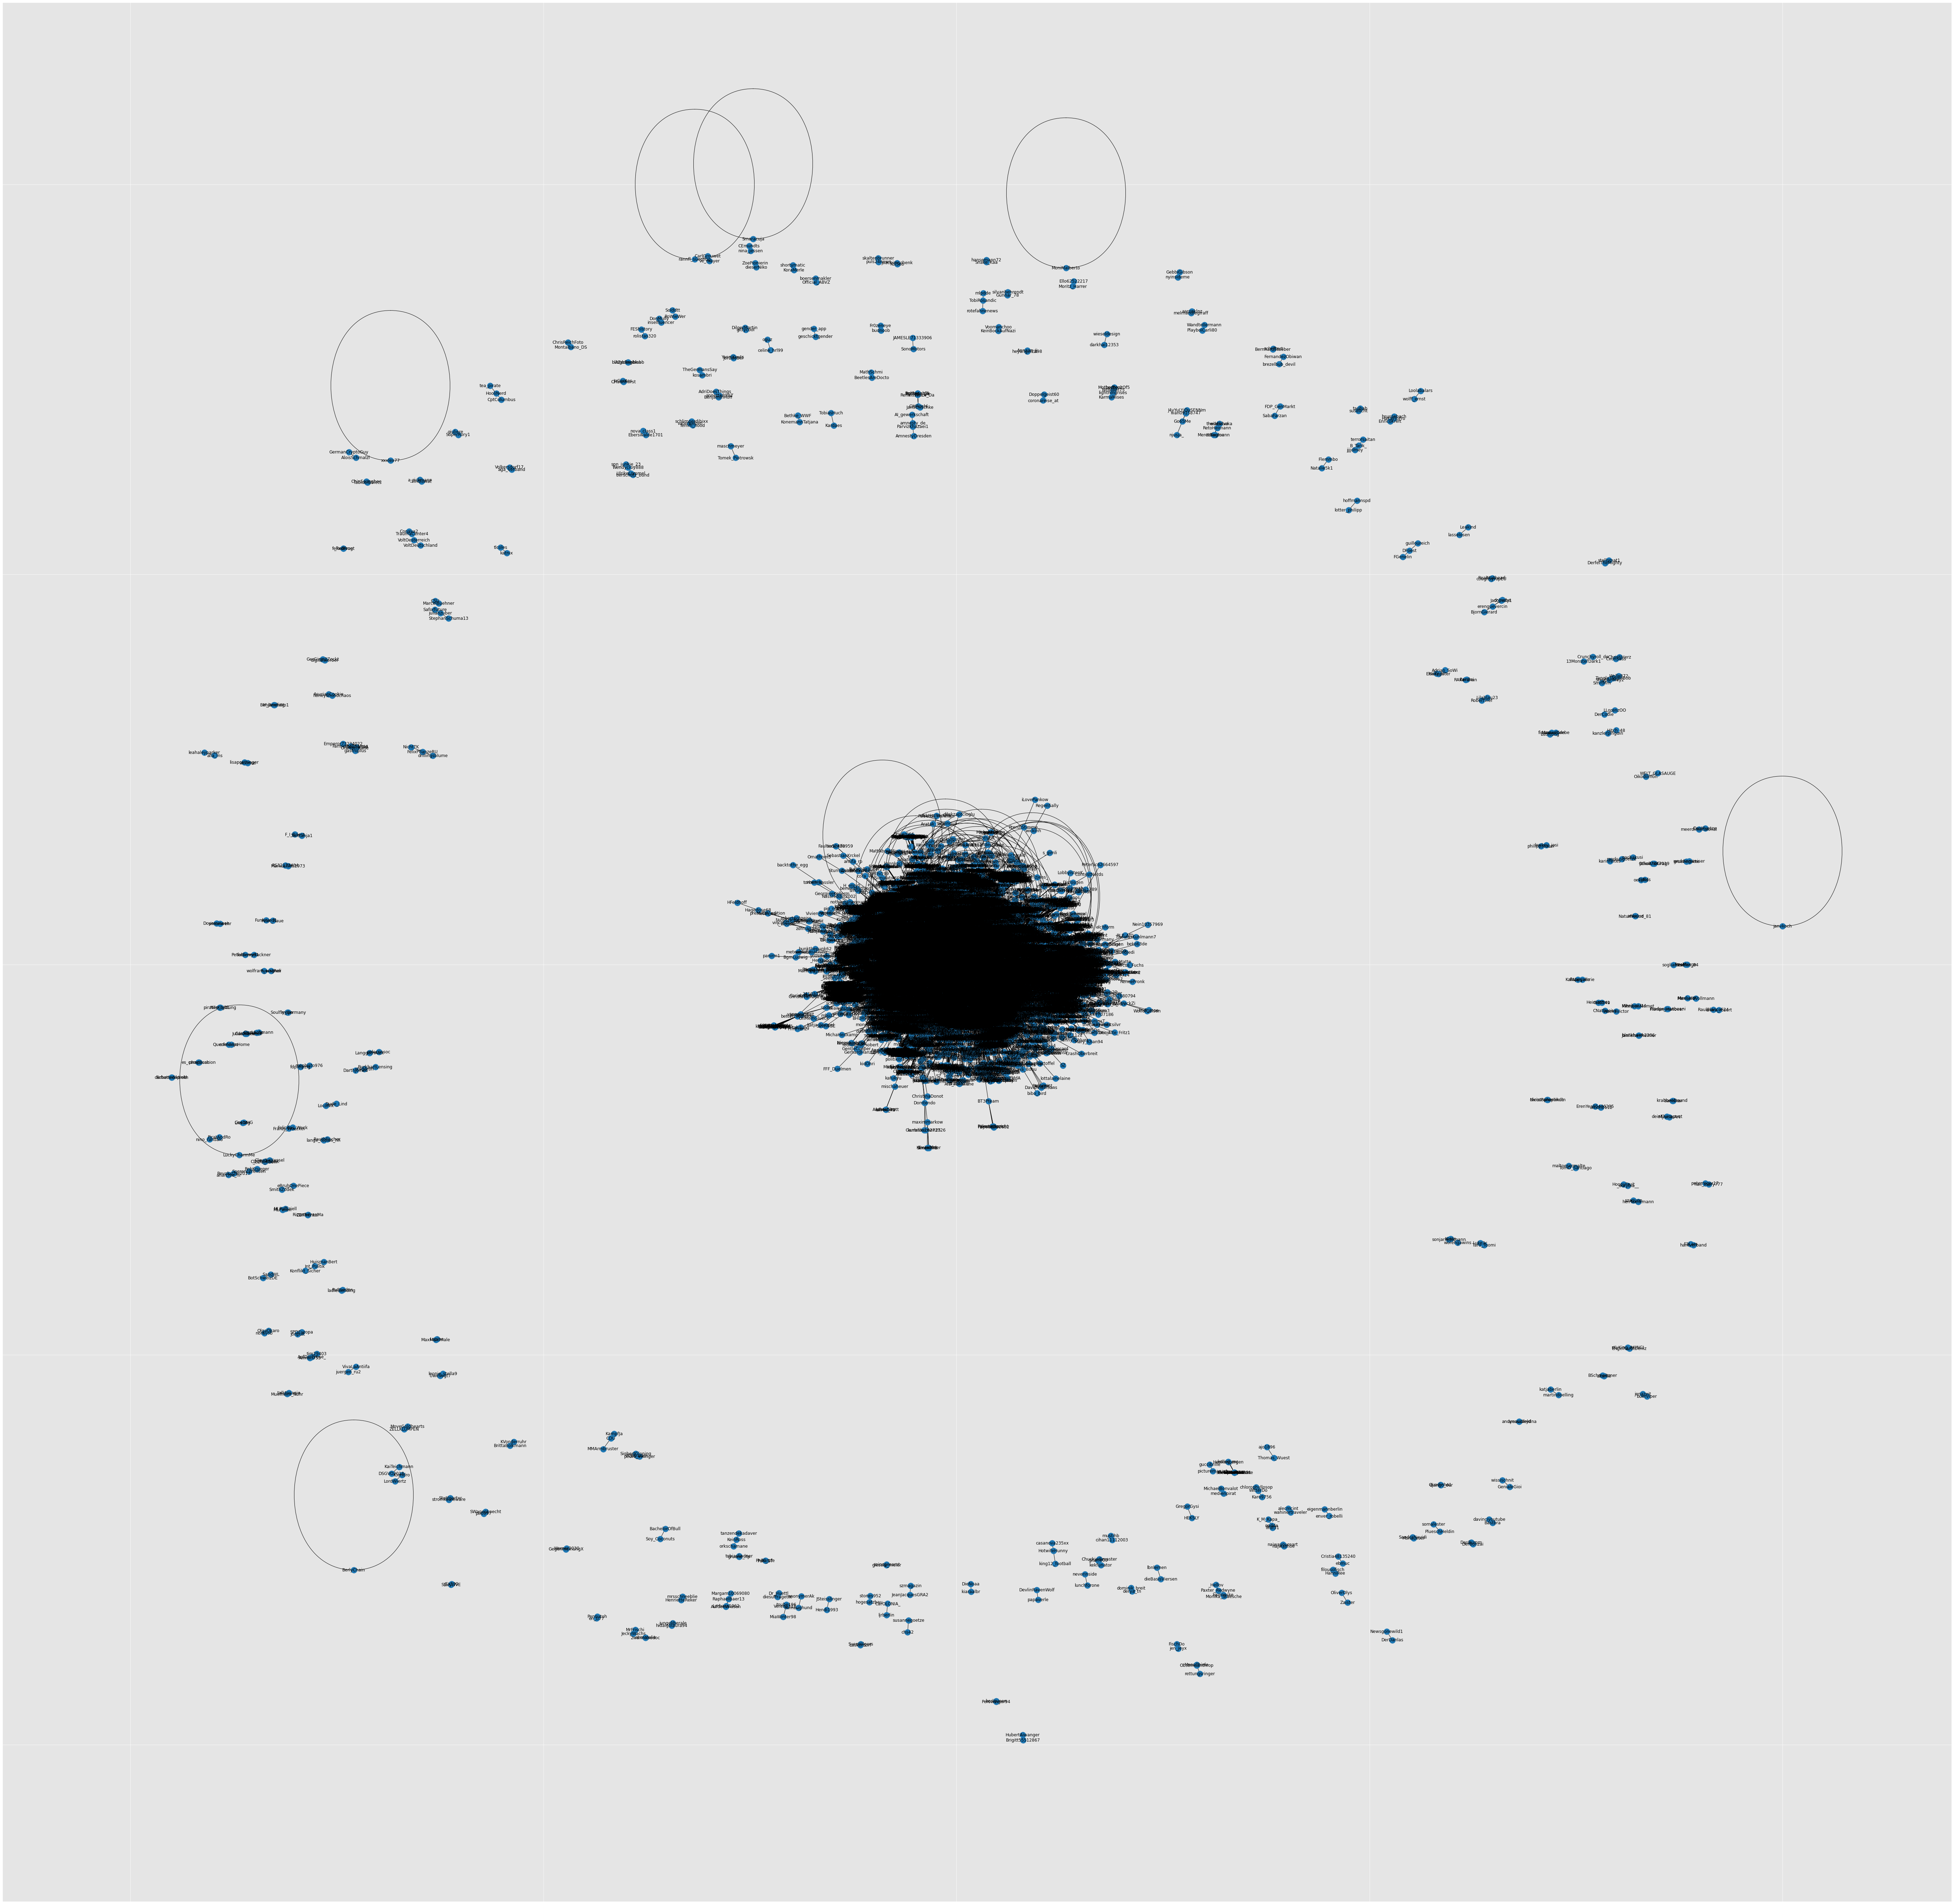

In [ ]:
G_weighted1 = nx.Graph()
df2 = pd.read_csv("/content/colab_test_df2.csv")
df2.head(2)

for i2, data2 in df2.iterrows():
  if data2["Tweet_From"]:
    G_weighted1.add_edge(data2["Screen Name"],data2["Tweet_From"], weight = data2["Frequency"])
f, ax = plt.subplots(figsize=(100, 100))
plt.style.use('ggplot')
nx.draw_networkx(G_weighted1)

In [ ]:
### louvain community detection

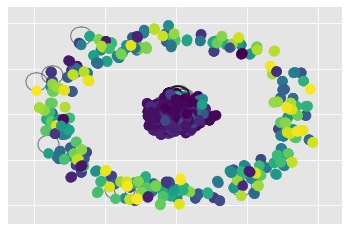

In [ ]:
import networkx as nx
#import community as community_louvain
import community.community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# define the graph
G_louvain = nx.Graph()
for i2, data2 in df2.iterrows():
  if data2["Tweet_From"]:
    try:
      G_louvain.add_edges_from((data2["Screen Name"],data2["Tweet_From"]))
    except: continue

# retrun partition as a dict
partition = community.community_louvain.best_partition(G)
# visualization
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
### Infomap
!pip install infomap
!pip install --upgrade infomap

In [ ]:
import infomap

# Command line flags can be added as a string to Infomap
im = infomap.Infomap("--two-level --directed")
#network = im.network()

for i2, data2 in df2.iterrows():
  if data2["Tweet_From"]:
    im.add_link(data2["Screen Name"],data2["Tweet_From"])
# Run the Infomap search algorithm to find optimal modules
im.run()

print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")

print("Result")
print("\n#node module")
for node in im.tree:
    if node.is_leaf:
        print(node.node_id, node.module_id)

TypeError: ignored

In [ ]:
import leidenalg
import igraph as ig

G = ig.Graph.Erdos_Renyi(100, 0.1);